In [ ]:
import numpy as np  
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Get data 

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
dataset = pd.read_csv(url, names=names)  
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Seperate data's labels and observations

In [7]:
X = dataset.drop('Class', 1)  
y = dataset['Class']  

Split dataset intor training and test,standardize the train and test data set  

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [10]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [12]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

It can be seen that first principal component is responsible for 72.22% variance. Similarly, the second principal component causes 23.9% variance in the dataset. Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained in the feature set is captured by the first two principal components.

Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

Training and Making Predictions
In this case we'll use random forest classification for making the predictions.

In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test) 

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + accuracy_score(y_test, y_pred)) 

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]


TypeError: can only concatenate str (not "numpy.float64") to str

It can be seen from the output that with only one feature, the random forest algorithm is able to correctly predict 28 out of 30 instances, resulting in 93.33% accuracy.

## Results with 2 and 3 Principal Components
Now let's try to evaluate classification performance of the random forest algorithm with 2 principal components. Update this piece of code:

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + accuracy_score(y_test, y_pred)) 

ValueError: n_components=2 must be between 0 and n_features=1 with svd_solver='full'

### Discussion
From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is equal to the accuracy achieved with will feature set i.e. 93.33%. It is also pertinent to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components. From the results we can see that the accuracy achieved with one principal component (93.33%) was greater than the one achieved with two principal components (83.33%).

The number of principal components to retain in a feature set depends on several conditions such as storage capacity, training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns. A good way is to plot the variance against principal components and ignore the principal components with diminishing values as shown in the following graph:

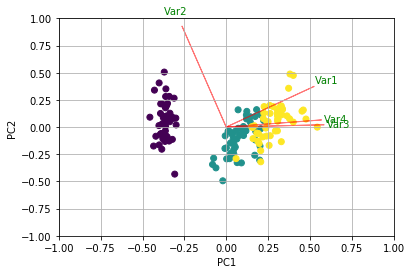

In [2]:
# source: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

## import data

my_csv = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv" ## path to your dataset

dat = pd.read_csv(my_csv, index_col=0)
# if no row or column titles in your csv, pass 'header=None' into read_csv
# and delete 'index_col=0' -- but your biplot will be clearer with row/col names



## perform PCA

n = len(dat.columns)

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(dat.index)[i], color='b')

plt.show()

ValueError: could not convert string to float: 'virginica'